# Neural networks: Multi Layer Perceptron
## In this lab we will learn about Multi-layer Perceptrons



In [5]:
import numpy as np
import seaborn as sns
import pandas as pd

import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data


# From sklearn we will use the implementations of the Multi-layer perceptron
from sklearn import cluster
from sklearn.datasets import fetch_mldata
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import binarize
from sklearn.neural_network import BernoulliRBM
from sklearn.datasets.mldata import fetch_mldata
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_digits
from keras.datasets import mnist


# We will also use different metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import recall_score
from sklearn import metrics





from IPython.display import display
from IPython.display import Image

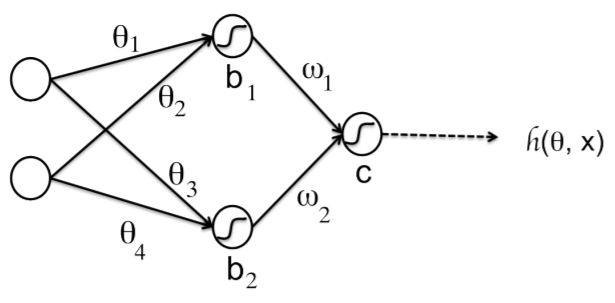

In [22]:
i = Image(filename='images/MLP_Networks_Parameters.png')
i

The multilayer perceptron is a neural network that may have one or more HIDDEN layers composed of perceptrons. It has a number of particular characteristics:

1) It is used for Supervised Machine Learning.

2) Differently to the Perceptron model, it can approximate non-linear functions.

3) It can be used for regression and classification. 

4) It can simultaneously approximate two or more target variables. 

Take some time to check the structure of a multi-layer perceptron in the following image.

Each of the nodes in the graph is known as neurons, to mantain the parallelism with the neural network denomination. However, they are nothing but perceptrons located one besides the other, or in sequential order.

We will use the multi-layer Perceptron for classification and regression. For classification, we will use the fashion_mnist dataset. sklearn has one classifier that consists of a common MLP; MLPClassifier. It can be used as any other classifier seen in the subject so far.

We read the fashion dataset and select training and test sets. 

In [7]:
data = input_data.read_data_sets('data/fashion')
nsamples = 1200
X_fashion_train, y_fashion_train = data.train.next_batch(nsamples)
X_fashion_test, y_fashion_test = data.test.next_batch(nsamples)
fashion_labels = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']


Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting data/fashion/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting data/fashion/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting data/fashion/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting data/fashion/t10k-labels-idx1-ubyte.gz


A multi-layer perceptron classifier is defined. It has only one hidden layer of 50 neurons. 

In [9]:
 mpl_clf = MLPClassifier(hidden_layer_sizes=(50), random_state=1)

In [10]:
 mpl_clf.fit(X_fashion_train,y_fashion_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=50, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

## Exercise 1

Determine how many parameters has learned this multi-layer perceptron network.

Hint: You may use the following functions to check the number of parameters. 

In [12]:
print(mpl_clf.coefs_[0].shape)  # First weight layer (mapping from input to first hidden layer)
print(mpl_clf.intercepts_[0].shape)  # Bias component added in the first hidden layer


(784, 50)
(50,)


The model is used to compute the predictions on the test data. 

In [13]:
mpl_fashion_prediction = mpl_clf.predict(X_fashion_test)

The confusion matrix is computed.

In [14]:
metrics.confusion_matrix(y_fashion_test, mpl_fashion_prediction, labels=range(10), sample_weight=None)

array([[117,   0,   0,   0,   0,   1,   7,   0,   0,   0],
       [  0, 122,   0,   0,   0,   1,   2,   1,   2,   0],
       [  1,   1,  96,   3,   5,   0,   2,   1,   2,   0],
       [  0,   0,   3, 119,   0,   3,   0,   2,   0,   0],
       [  0,   0,   1,   0, 109,   0,   3,   0,   0,   8],
       [  0,   0,   0,   8,   3,  80,   3,   0,   4,   1],
       [  4,   0,   4,   0,   2,   3, 117,   0,   1,   0],
       [  0,   1,   4,   2,   2,   0,   0, 107,   0,   4],
       [  3,   1,   0,   4,   2,   2,   2,   2,  93,   2],
       [  5,   1,   0,   1,   5,   0,   0,   3,   1, 111]])

## Exercise 2

In this exercise, we are tackling the common problem of clasifying hand-written digits. We are simplifying this exercise to modeling whether the number is larger or smaller than 5, so that we have a binary classification problem.

- Implement a MLP classifier that classifies hand-written digits as higher than five or lower than five. It should have 2 hidden layers and 100 neurons in each layer.


In the following cell, see  how the data containing the hand-written digits is loaded, and treated, so that we can use it with a regular MLP.


In [15]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(y_train)
y_train = np.array([1 if x > 4 else 0 for x in y_train])
print(y_train)
print(y_test)
y_test = np.array([1 if x > 4 else 0 for x in y_test])
print(y_test)

X_train = np.reshape(X_train, (60000, 28*28))  # What are these two lines doing?
X_test = np.reshape(X_test, (10000, 28*28))
train_n_samples = 60000

[5 0 4 ... 5 6 8]
[1 0 0 ... 1 1 1]
[7 2 1 ... 4 5 6]
[1 0 0 ... 0 1 1]


Understanding how a neural network works is a very difficult task, and is yet to be completely solved. 

## Exercise 3

A common approach to understand how a neural network works is to visualize the coefficients generated while training, so that it can be seen what areas of the data are more relevant to the classifier. 

- Use the  visualize_coefs function given below to graphically show the coefficients of the first hidden layer. - 

- Interpret that result. 



In [16]:
def visualize_coefs(clf):
    """
    clf must be the instanced (and trained) classifier
    """
    fig, axes = plt.subplots(4, 4)
    # use global min / max to ensure all weights are shown on the same scale
    vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
    for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
        ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin, vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

    plt.show()

A multi-layer perceptron classifier is defined. It has only one hidden layer of 50 neurons. 

As previously mentioned, the multi-layer perceptron can be also used for regression. The network architecture is the same except that the last activation functions are identity functions (they output continuous values instead of 0,1, or probabilities). 

To test multi-layer regressor we will use the "Appliances energy prediction Data Set" from the UCI database: https://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction

This dataset contains data about the electricity consumption of a house during a long time period. Environmental variables are measured in all the rooms of the house. Our goal will be to predict the energy used by the Appliances, AND the energy use of light fixtures. Therefore, we want to SIMULTANEOSLY learn to predict TWO variables. For this purpose we will use a multi-layer regression model.

We read the dataset.

In [17]:
# Stores the data as a dataframe of Pandas
df = pd.read_csv('energydata_complete_cleaned.csv',sep=',')
print(df)

                      date  Appliances  lights         T1       RH_1  \
0      2016-01-11 17:00:00          60      30  19.890000  47.596667   
1      2016-01-11 17:10:00          60      30  19.890000  46.693333   
2      2016-01-11 17:20:00          50      30  19.890000  46.300000   
3      2016-01-11 17:30:00          50      40  19.890000  46.066667   
4      2016-01-11 17:40:00          60      40  19.890000  46.333333   
5      2016-01-11 17:50:00          50      40  19.890000  46.026667   
6      2016-01-11 18:00:00          60      50  19.890000  45.766667   
7      2016-01-11 18:10:00          60      50  19.856667  45.560000   
8      2016-01-11 18:20:00          60      40  19.790000  45.597500   
9      2016-01-11 18:30:00          70      40  19.856667  46.090000   
10     2016-01-11 18:40:00         230      70  19.926667  45.863333   
11     2016-01-11 18:50:00         580      60  20.066667  46.396667   
12     2016-01-11 19:00:00         430      50  20.133333  48.00

## Exercise 4


Create a Multi-layer Regressor model for predicting the "Appliances" and "lights" variables. The neural network should have 2 hidden layers, the first of 50 neurons, and the second of 20.

Use the mean squared error to compute the quality of the prediction.
Suggestions. See:

http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error

and consult the Pandas library help if required for extracting a subsect of columns from the matrix.

## Exercise 5

Now that we know how to create a MLP the easy way, we are going to give one step further, and design a MLP using tensorflow from scratch.

1) Using the same technique used in the tensorflow notebook, design a MLP using tensorflow. Following the notation used in the previous notebook to formalize the linear models (y = W*X + b), a one-hidden-layer MLP can be defined as y = (W1*X + b1)*W2 + b2. The rest of the tensorflow components (loss function, optimizer, ...) need no changes to work with this model. The MLP will have one single hidden layer, of 100 neurons.

2) Use the designed MLP to learn a **classifier** for the MNIST dataset that was used in the example.

3) Modify the visualize_coefs function so that it can show some of the coefficients in the first layer of the learned network.

4) Along with the error, display the accuracy of the model while training it.

In [18]:
tf.reset_default_graph()
mini_batch_size = 100

training_epochs = 40000
display_step = 500
perm = np.random.permutation(train_n_samples)


n_batch = train_n_samples // mini_batch_size + (train_n_samples % mini_batch_size != 0)

# Declare the placeholders

# Declare the rest of variables

# Create the model



# Declare the optimizer


# Create variable initializer





In [19]:
init = tf.global_variables_initializer()


with tf.Session(config=tf.ConfigProto(allow_soft_placement=True, log_device_placement=True)) as sess:

    sess.run(init)

    for epoch in range(training_epochs):
        i_batch = (epoch % n_batch)*mini_batch_size
        batch = X_train[i_batch:i_batch+mini_batch_size], y_train[i_batch:i_batch+mini_batch_size]
        
        # Run the optimizer
        
        if (epoch+1) % display_step == 0:
            err, p = sess.run((loss, tf.nn.sigmoid(prediction)), feed_dict={X: batch[0],  Y: np.reshape(batch[1], (-1,1))})
            
            # Compute and show the accuracy of the model
            
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(err))

    training_loss = sess.run(loss, feed_dict={X: X_test, Y: np.reshape(y_test, (-1,1))})
    print("Training loss=", training_loss, '\n')
    

Epoch: 0500 cost= 22345.894531250
Epoch: 1000 cost= 9289.802734375
Epoch: 1500 cost= 14078.804687500
Epoch: 2000 cost= 16113.824218750
Epoch: 2500 cost= 6874.149414062
Epoch: 3000 cost= 5601.202636719
Epoch: 3500 cost= 5300.345214844
Epoch: 4000 cost= 4505.259765625
Epoch: 4500 cost= 4462.537109375
Epoch: 5000 cost= 6543.642578125
Epoch: 5500 cost= 3112.069335938
Epoch: 6000 cost= 2164.644287109
Epoch: 6500 cost= 2952.400878906
Epoch: 7000 cost= 2533.400878906
Epoch: 7500 cost= 2591.154785156
Epoch: 8000 cost= 3480.496337891
Epoch: 8500 cost= 1804.339843750
Epoch: 9000 cost= 1172.098754883
Epoch: 9500 cost= 1829.526367188
Epoch: 10000 cost= 1590.295776367
Epoch: 10500 cost= 1700.266601562
Epoch: 11000 cost= 2098.559082031
Epoch: 11500 cost= 1056.770751953
Epoch: 12000 cost= 595.974121094
Epoch: 12500 cost= 1233.080200195
Epoch: 13000 cost= 1068.592529297
Epoch: 13500 cost= 1130.729492188
Epoch: 14000 cost= 1334.180786133
Epoch: 14500 cost= 652.834045410
Epoch: 15000 cost= 372.361785889

Up until this point, we have let tensorflow optimize our models (both the simple ones that we did in the last lab, and the more complex MLP in this one) without much knowledge about the numerical computations that the optimizer did. Now that we know more about the backpropagation error, we are going to dig deeper into tensorflow, and see what operations are being performed in each step of the model training.

You first need to create a list of the variables that you created in Exercise 5. (variable_list=[variables])

To know how the values change in each learning iteration, we are going to divide the optimizing operation in two halves, gradient computing, and gradient application:

In [20]:
# Create variable_list with all the variables you declared in the model in Exercise 5.
grads = adam.compute_gradients(loss, var_list=variable_list)
application = adam.apply_gradients(grads)

In the previous cell, we have set a tensorflow operation that computes the gradients for all the variables, and then, we have defined another operation that applies these gradients to the variable.

The *grads* object contains the current value of the variables, and the gradient of these variables.
Using these two tensorflow operations results in the same outcome as using the minimize(loss) function of the optimizer.


In [21]:
init = tf.global_variables_initializer()


with tf.Session(config=tf.ConfigProto(allow_soft_placement=True, log_device_placement=True)) as sess:

    sess.run(init)

    for epoch in range(training_epochs):
        i_batch = (epoch % n_batch)*mini_batch_size
        batch = X_train[i_batch:i_batch+mini_batch_size], y_train[i_batch:i_batch+mini_batch_size]
        gs = sess.run(grads, feed_dict={X: batch[0], Y: np.reshape(batch[1], (-1,1))})
        
        # print some variables in the gs object, so that you see what you are computing
            
        sess.run(application, feed_dict={X: batch[0], Y: np.reshape(batch[1], (-1,1))})
        
        if (epoch+1) % display_step == 0:
            err, p = sess.run((loss, tf.nn.sigmoid(prediction)), feed_dict={X: batch[0],  Y: np.reshape(batch[1], (-1,1))})            
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(err))

    training_loss = sess.run(loss, feed_dict={X: X_test, Y: np.reshape(y_test, (-1,1))})
    print("Training loss=", training_loss, '\n')

Epoch: 0500 cost= 23249.099609375
Epoch: 1000 cost= 12111.042968750
Epoch: 1500 cost= 8718.746093750
Epoch: 2000 cost= 11730.282226562
Epoch: 2500 cost= 4435.153320312
Epoch: 3000 cost= 4008.000732422
Epoch: 3500 cost= 5711.515136719
Epoch: 4000 cost= 3461.881347656
Epoch: 4500 cost= 3582.270019531
Epoch: 5000 cost= 5725.758300781
Epoch: 5500 cost= 2394.119384766
Epoch: 6000 cost= 2258.432373047
Epoch: 6500 cost= 3065.300048828
Epoch: 7000 cost= 1622.349243164
Epoch: 7500 cost= 2112.745849609
Epoch: 8000 cost= 3314.595947266
Epoch: 8500 cost= 1339.530761719
Epoch: 9000 cost= 1358.608642578
Epoch: 9500 cost= 1681.686401367
Epoch: 10000 cost= 946.936401367
Epoch: 10500 cost= 1392.259887695
Epoch: 11000 cost= 1946.340942383
Epoch: 11500 cost= 766.386901855
Epoch: 12000 cost= 824.026977539
Epoch: 12500 cost= 984.377197266
Epoch: 13000 cost= 703.128112793
Epoch: 13500 cost= 901.186584473
Epoch: 14000 cost= 1168.115356445
Epoch: 14500 cost= 494.756805420
Epoch: 15000 cost= 503.610046387
Epoc

## Exercise 6

Now, we are going to simulate the backpropagation algorithm. As you know, this algorithm computes the gradients (how the weights should change) of the network starting from the last layer to the first one. For that, we have to accomplish the following objectives:

1) Create a deep neural network with more than one hidden layer. Keep the number of neurons relatively low, so that the training of the model does not consume much time.

2) Use the *compute_gradients* function to compute the gradients of the layers. In this exercise, this operation must be done separately for each layer; you need to call the *compute_gradients* function for each layer of the network. Use the *var_list* parameter of the function.

3) Use the *apply_gradients* function as it needs to be used, to create the tensorflow operations that we will later use to update the weights.

4) Modify the training algorithm. Include in this algorithm the gradient application operations that you created.

Take into account the order in which these operatinos have to be run by tensorflow, maintaining coherence with the backpropagation algorithm.

In [23]:
tf.reset_default_graph()
mini_batch_size = 100

# You can reuse the variables declared in exercise 5, or create new variables:


# Declare the placeholders

# Declare the rest of variables

# Create the model



# Declare the optimizer


# Create variable initializer

In [24]:
# Declare gradient computation operations

# Create gradient application operations


In [25]:
init = tf.global_variables_initializer()


with tf.Session(config=tf.ConfigProto(allow_soft_placement=True, log_device_placement=True)) as sess:

    sess.run(init)

    for epoch in range(training_epochs):
        i_batch = (epoch % n_batch)*mini_batch_size
        batch = X_train[i_batch:i_batch+mini_batch_size], y_train[i_batch:i_batch+mini_batch_size]
            
        # Introduce the gradient application operations.
        
        if (epoch+1) % display_step == 0:
            err, p = sess.run((loss, tf.nn.sigmoid(prediction)), feed_dict={X: batch[0],  Y: np.reshape(batch[1], (-1,1))})
            
            # Compute and show the accuracy of the model
            
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(err))

    training_loss = sess.run(loss, feed_dict={X: X_test, Y: np.reshape(y_test, (-1,1))})
    print("Training loss=", training_loss, '\n')
    

Epoch: 0500 cost= 31290.500000000
Epoch: 1000 cost= 9621.034179688
Epoch: 1500 cost= 5730.494140625
Epoch: 2000 cost= 7295.237304688
Epoch: 2500 cost= 5118.367675781
Epoch: 3000 cost= 4219.243164062
Epoch: 3500 cost= 7164.006347656
Epoch: 4000 cost= 3458.316894531
Epoch: 4500 cost= 1705.929321289
Epoch: 5000 cost= 3845.572509766
Epoch: 5500 cost= 1645.534179688
Epoch: 6000 cost= 1570.734741211
Epoch: 6500 cost= 2951.278808594
Epoch: 7000 cost= 1779.464355469
Epoch: 7500 cost= 929.589599609
Epoch: 8000 cost= 2157.498046875
Epoch: 8500 cost= 748.198852539
Epoch: 9000 cost= 830.037841797
Epoch: 9500 cost= 1531.391357422
Epoch: 10000 cost= 1090.705200195
Epoch: 10500 cost= 508.355743408
Epoch: 11000 cost= 1390.462402344
Epoch: 11500 cost= 478.506011963
Epoch: 12000 cost= 575.124816895
Epoch: 12500 cost= 988.616088867
Epoch: 13000 cost= 703.920654297
Epoch: 13500 cost= 310.415344238
Epoch: 14000 cost= 933.083740234
Epoch: 14500 cost= 327.985778809
Epoch: 15000 cost= 397.376373291
Epoch: 155